In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/iris.m", header=None)

In [3]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [4]:
X = np.hstack([X, np.ones((len(X), 1))])  # adiciona bias
d = X.shape[1]  # quantidade de features
k = len(np.unique(y))  # quantidade de classes

In [5]:
# prepara o Y para multiclasse
unique_classes = list(np.unique(y))
Ytr = np.zeros((len(X), k))

for i, yi in enumerate(y):
    classindex = unique_classes.index(yi)
    Ytr[i][classindex] = 1

---

## Softmax regression

In [27]:
def softmax(Ŷ):
    expY = np.exp(Ŷ)
    return  expY / np.sum(expY, axis=1).reshape(150, 1)

def cross_entropy(Ytr, Ŷ):
    return -np.sum(np.multiply(Ytr, np.log(Ŷ)))

In [34]:
alpha = 1e-3
W = np.random.rand(k, d)

In [35]:
Ŷ = softmax(X @ W.T)
erro = Ŷ - Ytr
grad = erro.T @ X
loss_values = []

In [36]:
grad_norm = np.linalg.norm(grad.flatten())

it = 0
while grad_norm > 1e-3 and it <= 1000:
    W = W - alpha * grad
    Ŷ = softmax(np.matmul(X, W.T))
    erro = Ŷ - Ytr
    grad = erro.T @ X
    grad_norm  = np.linalg.norm(grad.flatten())

    loss = cross_entropy(Ytr, Ŷ)
    loss_values.append(loss)

    it += 1
    print(f"it: {it}, grad_norm: {grad_norm}, cross_entropy: {loss}")

it: 1, grad_norm: 470.7502258853334, cross_entropy: 243.19476078510087
it: 2, grad_norm: 627.9744502822249, cross_entropy: 272.69246801214
it: 3, grad_norm: 552.8213533111689, cross_entropy: 296.6253906401701
it: 4, grad_norm: 546.3383493154422, cross_entropy: 199.85280581544333
it: 5, grad_norm: 600.2922702165021, cross_entropy: 273.30702571992225
it: 6, grad_norm: 528.6530992033674, cross_entropy: 211.75961193672495
it: 7, grad_norm: 565.0180838035101, cross_entropy: 216.01912169598478
it: 8, grad_norm: 598.8521803588604, cross_entropy: 220.34698285355137
it: 9, grad_norm: 560.1650511220606, cross_entropy: 223.946330171195
it: 10, grad_norm: 556.9962755301847, cross_entropy: 187.1634590101254
it: 11, grad_norm: 606.9707006623064, cross_entropy: 215.61627891059334
it: 12, grad_norm: 541.5242594196942, cross_entropy: 207.7356479997663
it: 13, grad_norm: 542.6678903069982, cross_entropy: 172.0894790677729
it: 14, grad_norm: 566.654095170862, cross_entropy: 202.54926524632992
it: 15, gra

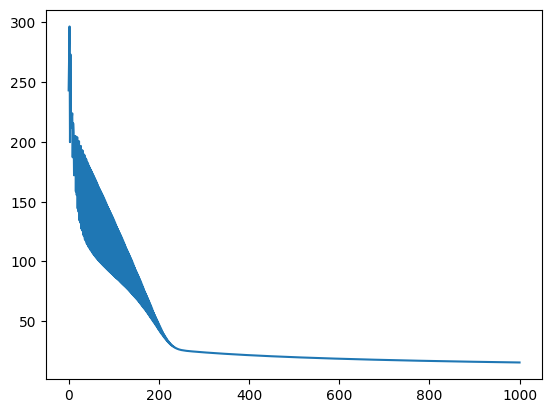

In [37]:
plt.plot(loss_values)